# OECD Linear Regressiob

## Daten für die Hausarbeit
- OECD
Regression Model OLS
Model:
    BIP = Oil_price + (m1,m2,m3) + CPI + evtl Arbeitslosigkeit

In [29]:
import pandas as pd
import datetime as dt

### GDP von der https://data.ecb.europa.eu/data/datasets/MNA/MNA.A.N.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.PE_R_POP.V._Z als CSV heruntergeladen


In [30]:
BIPEUArea = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data Portal_BIP_EuroArea.csv')
BIPEUArea.head()

,DATE,TIME PERIOD,Gross domestic product at market prices (MNA.A.N.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.PE_R_POP.V._Z)
0,1995-12-31,1995,17927.30
1,1996-12-31,1996,18652.69
2,1997-12-31,1997,19069.85
3,1998-12-31,1998,19814.33
4,1999-12-31,1999,20671.06


In [31]:
BIPEUArea = BIPEUArea.drop(columns=['TIME PERIOD'])
BIPEUArea = BIPEUArea.rename(columns={'DATE': 'Date', 'Gross domestic product at market prices (MNA.A.N.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.PE_R_POP.V._Z)': 'BIP'})
#BIP_EUArea['Date'] = pd.to_datetime(BIP_EUArea['Date'])

In [32]:
BIPEUArea['Date'] = pd.to_datetime(BIPEUArea['Date'])
BIPEUArea['Date'] = BIPEUArea['Date'].dt.strftime('%Y-%m')

In [33]:
BIPEUArea

,Date,BIP
0,1995-12,17927.30
1,1996-12,18652.69
2,1997-12,19069.85
3,1998-12,19814.33
4,1999-12,20671.06
5,2000-12,21695.89
6,2001-12,22653.83
7,2002-12,23312.29
8,2003-12,23862.55
9,2004-12,24755.37


## M1, M2, M3 Datasets

In [34]:
df_m1 = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data M1 Euro_Area.csv')
df_m2 = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data M2 Euro_Area.csv')
df_m3 = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB Data M3 Euro_Area.csv')
# in Euro

In [35]:
df_m1.rename(columns={'Monetary aggregate M1 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.Y.V.M10.X.1.U2.2300.Z01.E)': 'M1',
                      'DATE': 'Date'}, inplace=True)
df_m2.rename(columns={'Monetary aggregate M2 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.Y.V.M20.X.1.U2.2300.Z01.E)': 'M2',
                      'DATE': 'Date'}, inplace=True)
df_m3.rename(columns={'Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks) (BSI.M.U2.Y.V.M30.X.1.U2.2300.Z01.E)': 'M3',
                      'DATE': 'Date'}, inplace=True)

df_m1.drop(columns=['TIME PERIOD'], inplace=True)
df_m2.drop(columns=['TIME PERIOD'], inplace=True)
df_m3.drop(columns=['TIME PERIOD'], inplace=True)

In [36]:
#Change dateformat from YYYY-MM-DD to YYYY-MM (e.g. 2020-01-01 to 2020-01)
df_m1['Date'] = pd.to_datetime(df_m1['Date'])
df_m1['Date'] = df_m1['Date'].dt.to_period('M')

df_m2['Date'] = pd.to_datetime(df_m2['Date'])
df_m2['Date'] = df_m2['Date'].dt.to_period('M')

df_m3['Date'] = pd.to_datetime(df_m3['Date'])
df_m3['Date'] = df_m3['Date'].dt.to_period('M')

In [46]:
df_m3

,Date,M3
0,1980-01,1097404
1,1980-02,1105520
2,1980-03,1117228
3,1980-04,1122639
4,1980-05,1130672
...,...,...
525,2023-10,15971259
526,2023-11,16002988
527,2023-12,16137064
528,2024-01,16090898


In [48]:
import pandas as pd

# Assuming your CSV files have a 'Date' or 'Year-Month' column for timestamps
def convert_to_yearly(df):
  """Converts a pandas DataFrame with monthly data to a DataFrame with yearly data.

  Args:
      df (pd.DataFrame): The DataFrame containing monthly data.

  Returns:
      pd.DataFrame: A new DataFrame with yearly data.
  """

  # Convert 'Date' column to datetime if necessary
  if pd.api.types.is_period_dtype(df['Date']):
    df['Date'] = df['Date'].dt.to_timestamp()
  df['Year'] = pd.to_datetime(df['Date']).dt.year  # Assuming 'Date' column exists

  # Group by year and calculate the desired aggregation (e.g., sum, mean)
  if 'M1' in df.columns: 
    yearly_data = df.groupby('Year').agg(Sum=('M1', 'sum'))  # Replace 'column_to_sum' with your column
  elif 'M2' in df.columns: 
    yearly_data = df.groupby('Year').agg(Sum=('M2', 'sum'))
  elif 'M3' in df.columns: 
    yearly_data = df.groupby('Year').agg(Sum=('M3', 'sum'))

  return yearly_data

# Read the CSV files (replace paths if necessary)
df_m1_yearly = convert_to_yearly(df_m1.copy())  # Avoid modifying original DataFrame
df_m2_yearly = convert_to_yearly(df_m2.copy())  # Avoid modifying original DataFrame
df_m3_yearly = convert_to_yearly(df_m3.copy())  # Avoid modifying original DataFrame

# Print or use the yearly DataFrames as needed
df_m1_yearly.reset_index(inplace=True)
df_m2_yearly.reset_index(inplace=True)
df_m3_yearly.reset_index(inplace=True)



/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_10798/249150852.py:15: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):
/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_10798/249150852.py:15: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):
/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_10798/249150852.py:15: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['Date']):


In [51]:
df_m3_yearly

,Year,Sum
0,1980,13753340
1,1981,15221386
2,1982,16894347
3,1983,18541591
4,1984,20124855
5,1985,21820949
6,1986,23391232
7,1987,25235081
8,1988,27284477
9,1989,29823279


<Axes: title={'center': 'M1 Euro Area'}, xlabel='Year'>

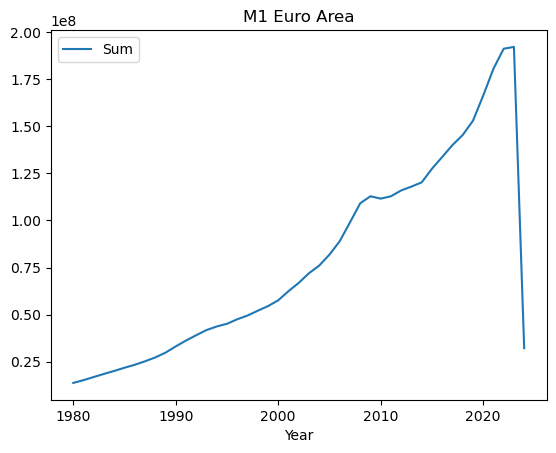

In [57]:
df_m3_yearly.plot(x='Year', y='Sum', kind='line', title='M1 Euro Area')

## Oil Price Datasets

In [ ]:
api_key = 'd9ce385a3f807aaba9590769b5f994a1'
OIL_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=POILBREUSDM&api_key={api_key}&file_type=json&frequency=m'
CPI_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=CPHPTT01EZM659N&api_key={api_key}&file_type=json&frequency=m'
un_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=LRHUTTTTEZM156S&api_key={api_key}&file_type=json&frequency=m'


In [ ]:
import requests
import json
import pandas as pd

# Setzen Sie Ihren API-Schlüssel hier ein

def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        observations = []
        for observation in data['observations']:
            date = observation['date']
            value = observation['value']
            if value != '.':
                value = float(value)
                observations.append({'Date': date, 'Value': value})
        df = pd.DataFrame(observations)
        return df
    else:
        print(f'Error: {response.status_code}')
        return None

Oil_price = get_data(OIL_dataURL)
Oil_price

In [ ]:
Oil_price['Date'] = pd.to_datetime(Oil_price['Date'])
Oil_price['Date'] = Oil_price['Date'].dt.to_period('M')
Oil_price.rename(columns={'Value': 'Oil Price'}, inplace=True)


In [ ]:
Oil_price

In [ ]:
CPI = get_data(CPI_dataURL)
CPI['Date'] = pd.to_datetime(CPI['Date'])
CPI['Date'] = CPI['Date'].dt.to_period('M')
CPI.rename(columns={'Value': 'CPI'}, inplace=True)
CPI

In [ ]:
unemployment_rate_EUArea = get_data(un_dataURL)
unemployment_rate_EUArea['Date'] = pd.to_datetime(unemployment_rate_EUArea['Date'])
unemployment_rate_EUArea['Date'] = unemployment_rate_EUArea['Date'].dt.to_period('M')
unemployment_rate_EUArea.rename(columns={'Value': 'Unemployment Rate in %'}, inplace=True)
unemployment_rate_EUArea

## Data Collection

In [ ]:
unemployment_rate_EUArea.shape, CPI.shape, Oil_price.shape, df_m1.shape, df_m2.shape, df_m3.shape

In [ ]:
unemployment_rate_EUArea['Date'].max(), CPI['Date'].max(), Oil_price['Date'].max(), df_m1['Date'].max(), df_m2['Date'].max(), df_m3['Date'].max()

In [ ]:
CPI_filtered = CPI.query('Date >= "1991-01" & Date <= "2023-01"')
unemployment_rate_EUArea_filtered = unemployment_rate_EUArea.query('Date >= "1991-01" & Date <= "2023-01"')
Oil_price_filtered = Oil_price.query('Date >= "1991-01" & Date <= "2023-01"')
df_m1_filtered = df_m1.query('Date >= "1991-01" & Date <= "2023-01"')
df_m2_filtered = df_m2.query('Date >= "1991-01" & Date <= "2023-01"')
df_m3_filtered = df_m3.query('Date >= "1991-01" & Date <= "2023-01"')




In [ ]:
unemployment_rate_EUArea_filtered.shape, CPI_filtered.shape, Oil_price_filtered.shape, df_m1_filtered.shape, df_m2_filtered.shape, df_m3_filtered.shape

In [ ]:
df_merged = unemployment_rate_EUArea_filtered.merge(CPI_filtered , on='Date', how='inner').merge(Oil_price_filtered, on='Date', how='inner').merge(df_m1_filtered, on='Date', how='inner').merge(df_m2_filtered, on='Date', how='inner').merge(df_m3_filtered, on='Date', how='inner')
df_merged.describe()

In [ ]:
df_merged.to_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_EU/ECB_Data_Merged.csv', index=False)

## Creating a Regression Model

In [ ]:
import statsmodels.api as sm
import numpy as np
>>> Y = duncan_prestige.data['income']
>>> X = duncan_prestige.data['education']
>>> X = sm.add_constant(X)
>>> model = sm.OLS(Y,X)
>>> results = model.fit()
>>> results.params